# Data Analysis Interview Challenge

importing packages needed

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

importing json files into this notebook

In [2]:
json_logins = open('logins.json')
ultimate_data_challenge = open('ultimate_data_challenge.json','r').readline()

In [3]:
logins = json.load(json_logins)
data = json.loads(ultimate_data_challenge)

In [4]:
json_logins.close()

In [5]:
df2 = pd.DataFrame(data)

## Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particulargeographic location. Aggregate these login counts based on 15­ minute time intervals, andvisualize and describe the resulting time series of login counts in ways that best characterize theunderlying patterns of the demand. Please report/illustrate important features of the demand,such as daily cycles. If there are data quality issues, please report them.

In [6]:
logins.keys()

dict_keys(['login_time'])

In [7]:
df = pd.DataFrame(pd.to_datetime(logins['login_time']), columns = ['login_time'])

In [8]:
display(df.head())

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [9]:
df[df['login_time'].isna()].shape

(0, 1)

In [10]:
df['count'] = 1
df = df.set_index('login_time')

In [11]:
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


resample login based on 15-minute time intervals

In [12]:
loginsDF = df.groupby(pd.Grouper(freq='15Min')).aggregate(np.sum) 
loginsDF['count'] = loginsDF['count'].fillna(0)
loginsDF.head(10)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


### exploritory data analysis

Text(0, 0.5, 'Counts')

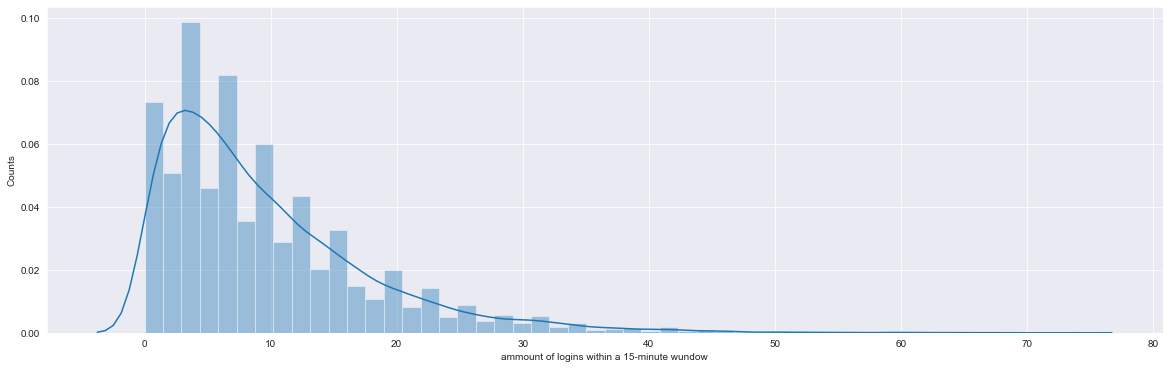

In [13]:
plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
sns.distplot(loginsDF['count'])
plt.xlabel("ammount of logins within a 15-minute wundow")
plt.ylabel("Counts")

as shown above, a majority of the login counts during a 15 minute time frame are in the range of 0 to 20 logins. 

Text(0.5, 1.0, 'login counts over a one month time frame')

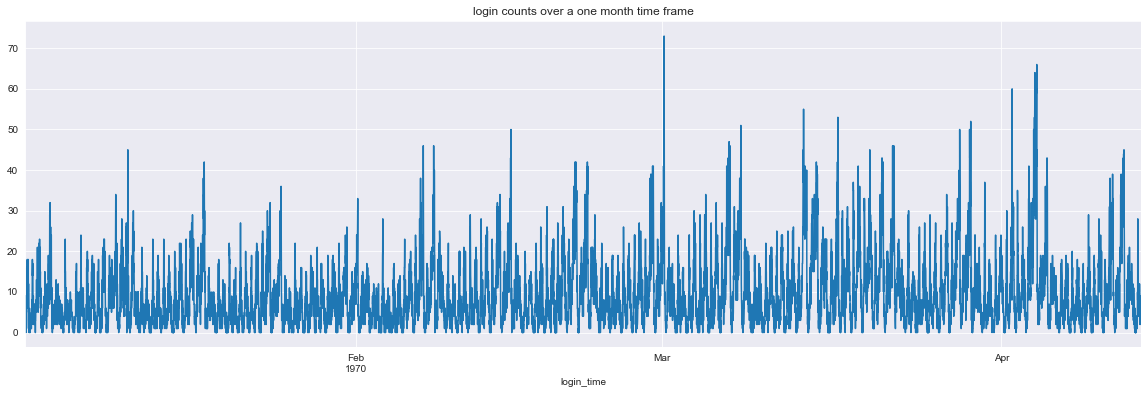

In [14]:
plt.figure(figsize=(20,6))
loginsDF['count'].plot()
plt.title('login counts over a one month time frame')

as we can see, there appears to be a sinosoidal patern to the logins being experienced. we can begin to suspect that there is a certain time interval where logins are higher than all other times. we will investigate that furthere <br>
before we look into peak login times/dates, we need to extract time featured from the date time index

In [15]:
# extracting time features from datetime index
loginsDF['month'] = loginsDF.index.month
loginsDF['week'] = loginsDF.index.week
loginsDF['day'] = loginsDF.index.day
loginsDF['hour'] = loginsDF.index.hour
loginsDF['dayofweek'] = loginsDF.index.dayofweek

In [16]:
display(loginsDF)

,count,month,week,day,hour,dayofweek
login_time,,,,,,
1970-01-01 20:00:00,2,1,1,1,20,3
1970-01-01 20:15:00,6,1,1,1,20,3
1970-01-01 20:30:00,9,1,1,1,20,3
1970-01-01 20:45:00,7,1,1,1,20,3
1970-01-01 21:00:00,1,1,1,1,21,3
...,...,...,...,...,...,...
1970-04-13 17:45:00,5,4,16,13,17,0
1970-04-13 18:00:00,5,4,16,13,18,0
1970-04-13 18:15:00,2,4,16,13,18,0


in order to get a better visual representation of login traffic, box plots will be created of log in traffics per hour and per day

[Text(0, 0, 'Mon'),
 Text(0, 0, 'Tue'),
 Text(0, 0, 'Wed'),
 Text(0, 0, 'Thu'),
 Text(0, 0, 'Fri'),
 Text(0, 0, 'Sat'),
 Text(0, 0, 'Sun')]

<Figure size 1440x432 with 0 Axes>

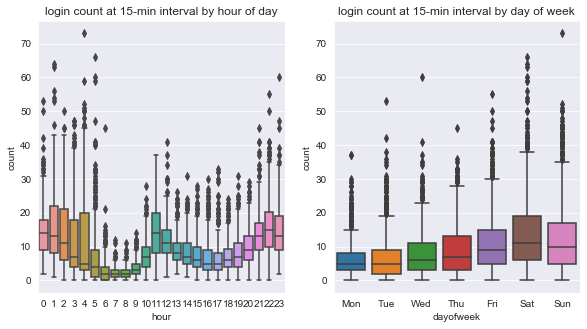

In [17]:
plt.figure(figsize=(20,6))

week = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
# boxplot showing daily and weekly cycles
plt.figure(figsize=(15,5))
# daily cycles
ax1 = plt.subplot(1,3,1)
sns.boxplot(x='hour',y='count',data=loginsDF,ax=ax1)
ax1.set_title('login count at 15-min interval by hour of day')
# weekly cycles
ax2 = plt.subplot(1,3,2)
sns.boxplot(x='dayofweek',y='count',data=loginsDF,ax=ax2)
ax2.set_title('login count at 15-min interval by day of week')
ax2.set_xticklabels(week)

peaks evey 12 hours between the hours of 21 and 4 (9PM and 4AM) with a slight upward trend around noon. along the hourly trends, login traffic gradually going up as the week goes on with saturday being the most active day of the week. 

looking at the data on a more macro level simmilar plots will be created on a weekly and monthly cycle

[Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April')]

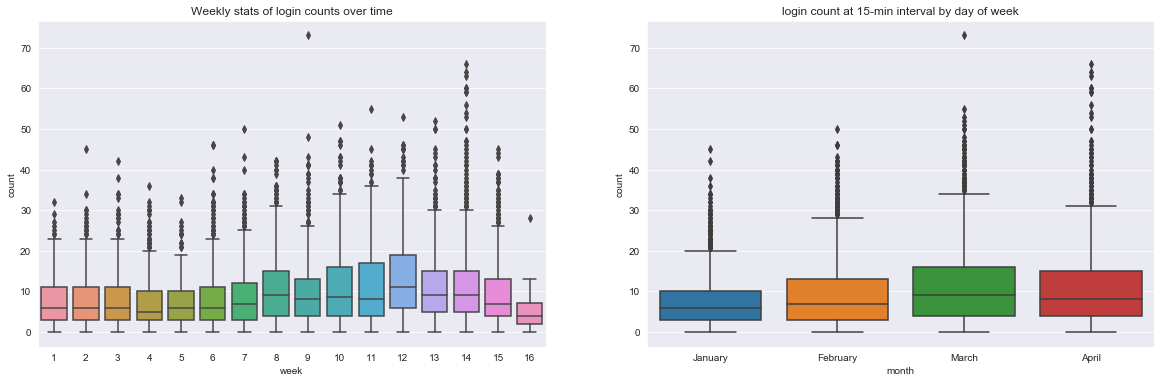

In [18]:
plt.figure(figsize=(20,6))

#weekly cycles
ax1 = plt.subplot(1,2,1)
sns.boxplot(x='week',y='count',data=loginsDF,ax=ax1);
ax1.set_title('Weekly stats of login counts over time');
#monthly cycles
months=['January', 'February', 'March', 'April']
ax2 = plt.subplot(1,2,2)
sns.boxplot(x='month',y='count',data=loginsDF,ax=ax2)
ax2.set_title('login count at 15-min interval by day of week')
ax2.set_xticklabels(months)


as we can see, weeks 1 to 14 are showing an upward trend with some drop off during weeks 15 and 16. this weekly cycle trend is reflected in the montly cycle where Janurary though March indicate an upward trend with a slight decline in April. This clrearly indicates that login traffic declines in April for a reason unknown to us as of now. 

## Part 2 ‑Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: onweekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most activeduring the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two ­way toll, between the two cities causes driver partners to tendto be exclusive to each city. The Ultimate managers of city operations for the two cities haveproposed an experiment to encourage driver partners to be available in both cities, byreimbursing all toll costs.

#### 1. What would you choose as the key measure of success of this experiment inencouraging driver partners to serve both cities, and why would you choose this metric?

I must first begin by pointing out the assumption of equal demand in both cities meaning that on weekends the demand is equal for either city and on week days, the city of Gotham experiences an equal demand during the night as Metropolis does during the day. next, classifying drivers as Gotham drives and Metropolis drivers both before the experiment and after the experiment based on which city they spend a majority of their time at. once the experiment is being executed, given the demand between the two cities is equal then the ratio of metropolis drivers vs Gotham drivers will trend towards one-to-one. similarly, classify the passengers based on what city they travel to the most and compare the passenger ration before and after the experiment by comparing population proportions on either sample. we can then test our null hypothesis based on the calculated p-value and if the null hypothesis fails, then its an indication that the experiment has been unsuccessful. 

the data has already been imported called df2

In [19]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   93142 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


data cleaning

In [21]:
df2.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

after searching all columns for missing values, we only have three columns that contain missing values which are 'avg_rating_of_driver', 'phone', and 'avg_rating_by_driver' so the missing values will be filled with the average. 

In [22]:
df2['avg_rating_of_driver'] = df2['avg_rating_of_driver'].fillna(df2['avg_rating_of_driver'].mean())

In [23]:
df2['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

as we can see, the most popular phone is an iphone so we will fill all missing values with 'iphone'

In [24]:
df2['phone'] = df2['phone'].fillna('iphone')

In [25]:
df2['avg_rating_by_driver'] = df2['avg_rating_by_driver'].fillna(df2['avg_rating_by_driver'].mean())

making sure we now have a completly na free dataframe

In [26]:
df2.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [27]:
df2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


now that we do not have any missing values, we can move forward. 

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


'signup_date' and ' last_trip_taken' are objects typses which needs to be changed before we move forward

In [29]:
df2['signup_date'] = df2['signup_date'].apply(lambda x: pd.Timestamp(x, tz=None))
df2['last_trip_date'] = df2['last_trip_date'].apply(lambda x: pd.Timestamp(x, tz=None))

we need to see what customers are returning so a new column is created for those customers that a trip was taken after june 1st in 2014

In [30]:
df2['returning'] = df2['last_trip_date'].apply(lambda x: 1 if x >= pd.Timestamp('2014-06-01', tz=None) else 0)

given that we now have a column of returning and new customers, we no longer need the columns 'signup_date' and 'last_trip_taken' so these can be dropped

In [31]:
mylist = ['signup_date', 'last_trip_date']
for i in mylist:
    df2 = df2.drop(i, axis=1)

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  bool   
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
 10  returning               50000 non-null  int64  
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 3.9+ MB


they are now of type 'datetime' which is what they should be.

data processing

In [33]:
df2 = pd.get_dummies(df2)

In [34]:
X, y = df2.drop(['returning', 'avg_surge'], axis=1), df2['returning']

In [35]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state = 10, stratify=y)

creating a Gradient boosting classifier model which will precict which group of customers are more likely to converted to returning customers. 

In [36]:
classifier = GradientBoostingClassifier()
classifier.fit(train_X, train_y)
print('the accuracy of the model is: ', classifier.score(test_X, test_y))

the accuracy of the model is:  0.7845


this model received an accuracy score of 78.45% meaning that if the model predics, for example, customers with iphones are 78.45% likely to return then 78.45% of that 80% will actually be returning. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

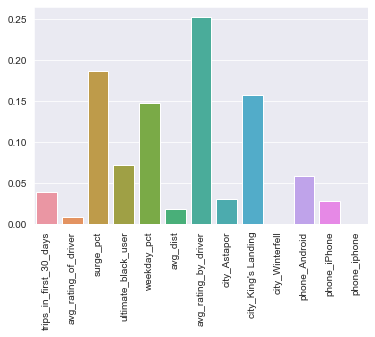

In [37]:
#plt.figure(figsize=(10,6))
sns.barplot(x=X.columns, y=classifier.feature_importances_)
plt.xticks(rotation = 90)

as we can tell by the graph above, customers that fall uner the 'Ultimate black' column have a higher likelyhood of returning so creating an incentive program with a few tiers that yield perks for returning customers will benifit these useres and keep them coming back. 
furthermore, those customers who use the service on weekdays have a high likelyhood to return so creating offers on weekdays will incentivise customers to return 